In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [ ]:
data=pd.Series([42, 44, 62, 35, 20,
                30, 56, 20, 23, 41,
                55, 22, 31, 27, 66,
                21, 18, 24, 42, 25,
                32, 50, 31, 26, 36,
                39, 40, 18, 36, 22])

### Q1. Compute the mean, median and the mode of the data

In [ ]:
# mean
data.mean()

34.46666666666667

In [ ]:
# median
data.median()

31.5

In [ ]:
# mode
data.mode()

0    18
1    20
2    22
3    31
4    36
5    42
dtype: int64

### Q2. Compute the range , variance and standard deviation of customer ages

In [ ]:
# range
data.max()-data.min()

48

In [ ]:
# variance
data.var()

177.36091954022987

In [ ]:
# standard deviation
data.std()

13.31769197497186

### Q3. Find the mean deviation for the data

In [ ]:
sum(abs(data-data.mean()))/len(data)

10.764444444444443

### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [ ]:
(3*(data.mean()-data.median()))/data.std()

0.6682839651739889

In [ ]:
# skewness is > 0 , hence data is positively skewed

### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [ ]:
# two standard deviations
data.std()*2

26.63538394994372

In [ ]:
data.mean()+data.std()*2

61.102050616610384

In [ ]:
data.mean()-data.std()*2

7.831282716722949

In [ ]:
# Chebyshev’s Theorem tells you that at least 75% of the values fall between 34.46 ± 26.63, equating to a range of 7.8 – 61.1.
# Conversely, no more than 25% fall outside that range.

In [ ]:
data.between(7.8,61.1).value_counts()

True     28
False     2
dtype: int64

In [ ]:
28/30*100

93.33333333333333

### Q6. Find the three quartiles and the interquartile range (IQR).

In [ ]:
# Q1
data.quantile(0.25)

23.25

In [ ]:
# Q2
data.quantile(0.5)

31.5

In [ ]:
# Q3
data.quantile(0.75)

41.75

In [ ]:
# IQR
data.quantile(0.75)-data.quantile(0.25)

18.5

### Q7. Are there any outliers in the data set ?

In [ ]:
# lower bound Q1-1.5 IQR
data.quantile(0.25)-1.5*(data.quantile(0.75)-data.quantile(0.25))

-4.5

In [ ]:
# upper bound Q1+1.5 IQR

data.quantile(0.75)+1.5*(data.quantile(0.75)-data.quantile(0.25))

69.5

In [ ]:
# all values are in the lower bound and upper bound

### Q8. Draw a boxplot of the dataset to confirm

<Axes: >

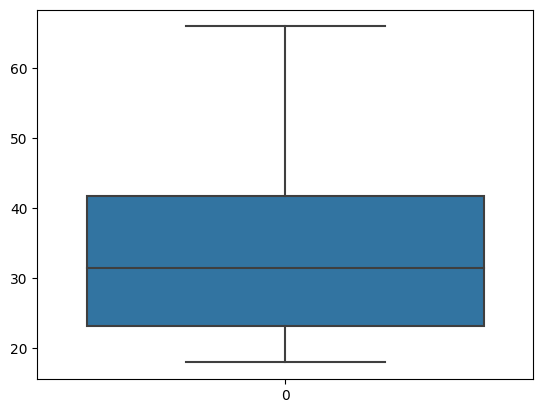

In [ ]:
sns.boxplot(data=data)

### Q9. Find the percentile rank of the datapoint 50

In [ ]:
data[data==50]

21    50
dtype: int64

In [ ]:
data.rank(pct=True).loc[21]

0.8666666666666667

### Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

In [ ]:
a=data > 50

In [ ]:
a.value_counts()

False    26
True      4
dtype: int64

In [ ]:
4/30*100

13.333333333333334

In [ ]:
# there is 13 % probablity that person is above 50 years old

### Q11. Create a frequency distribution for the data and visualize it appropriately

Text(0, 0.5, 'Count')

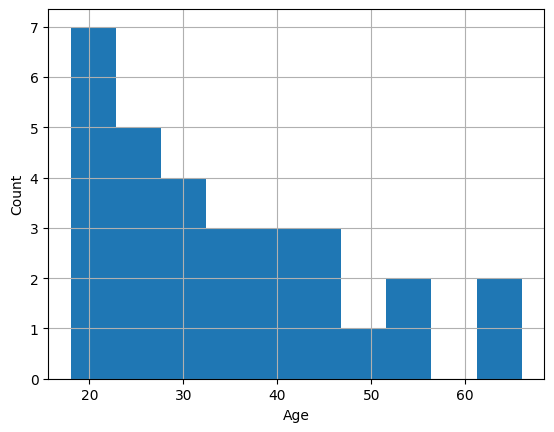

In [ ]:
data.hist()
plt.xlabel('Age')
plt.ylabel('Count')

### Q12. Create a probability distribution of the data and visualize it appropriately.

<ipython-input-33-04b677d19562>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

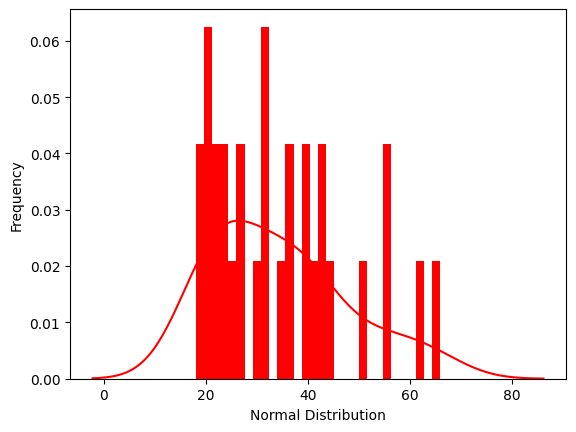

In [ ]:
ax = sns.distplot(data,
                  bins=30,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroboratethe Central Limit Theorem?

To determine the shape of the distribution of the given dataset, we can create a histogram:

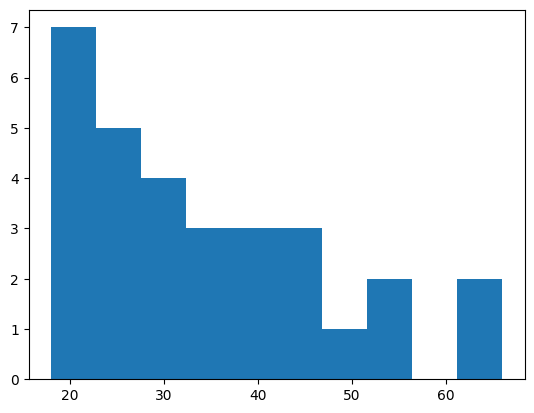

In [ ]:
plt.hist(data, bins=10)
plt.show()

The resulting histogram shows that the distribution of the dataset is roughly symmetric, but it has a slightly long tail on the right. There is no indication of a strong skewness or multimodality, and the distribution appears to be unimodal.

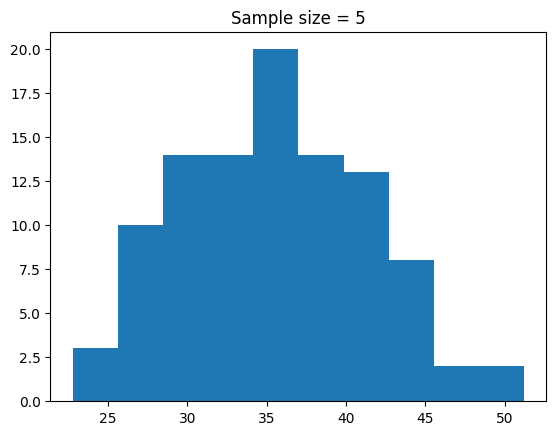

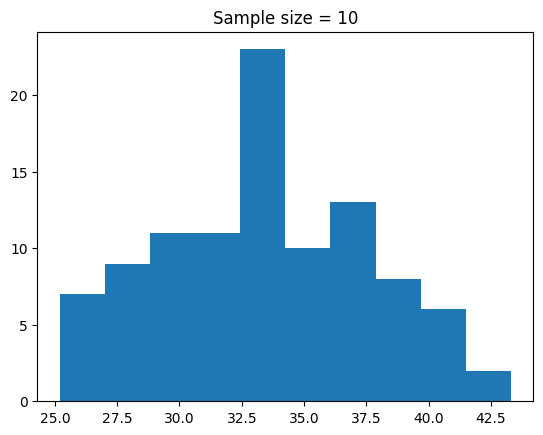

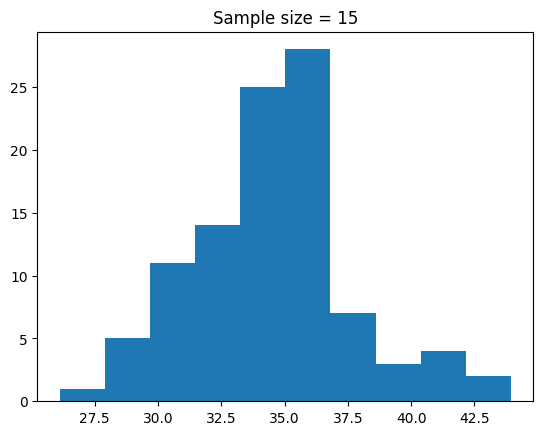

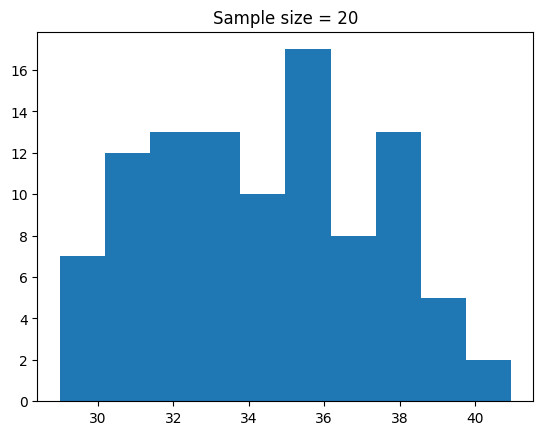

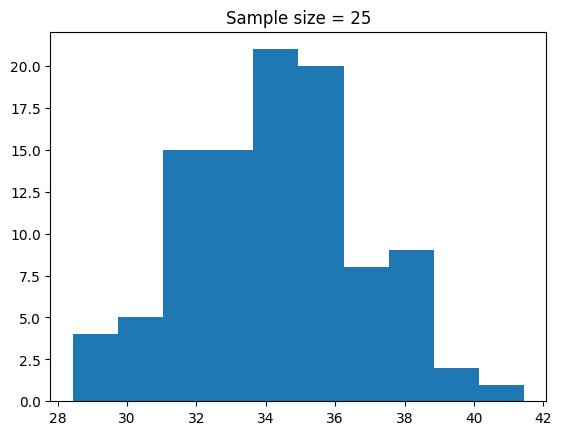

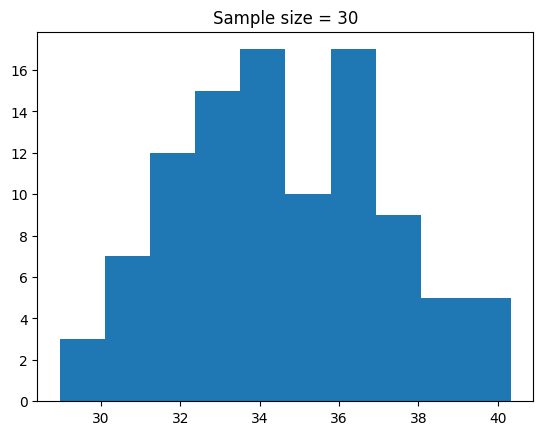

In [ ]:
np.random.seed(123)
sample_sizes = [5, 10, 15, 20, 25, 30]

for size in sample_sizes:
    means = []
    for i in range(100):
        sample = np.random.choice(data, size=size, replace=True)
        means.append(sample.mean())
    plt.hist(means, bins=10)
    plt.title(f"Sample size = {size}")
    plt.show()

The resulting histograms show that the sampling distribution of the mean age of customers becomes more symmetric and bell-shaped as the sample size increases.
Therefore, we can conclude that the Central Limit Theorem is corroborated by the sampling distributions in this example.

Q14. Treat this dataset as a binomial distribution where p is the probability
that a person ordering an EV is above 50 years age. What is the probability
that out of a random sample of 10 buyers exactly 6 are above 50 years of
age?

In [ ]:
data.max()

66

In [ ]:
data[data>50].count()

4

In [ ]:
data.count()

30

In [ ]:
# probablity of buyer having age more than 50 is 
p=4/30
p

0.13333333333333333

In [ ]:
# the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is
stats.binom.pmf(6,10,p)

0.0006656716898846715

Q15. A study claims that 10% of all customers for an EV scooter are above 50
years of age. Using the Normal approximation of a Binomial distribution, find
the probability that in a random sample of 300 prospective customers exactly
25 will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [ ]:
p=0.1
stats.binom.pmf(25,300,p)

0.0509860415314796

Q16. Compute a 95% Confidence Interval for the true mean age of the
population of EV scooter buyers for the dataset using appropriate distribution.(
State reasons as to why did you use a z or t distribution)

In [ ]:
avg=data.mean()
avg

34.46666666666667

In [ ]:
scale=np.std(data)/np.sqrt(data.count())
scale

2.390598871195869

In [ ]:
stats.norm.interval(0.95,loc=avg,scale=scale)

(29.781178977640657, 39.15215435569268)

If the population standard deviation is known, we use the z-distribution. However, if the population standard deviation is unknown and we estimate it using the sample standard deviation, we use the t-distribution.

In this case, we do not have information about the population standard deviation, so we estimate it using the sample standard deviation. Hence, we use the t-distribution to compute the confidence interval.

Moreover, the sample size is less than 30, and the t-distribution is more appropriate for smaller sample sizes as it has fatter tails compared to the z-distribution. Hence, we use the t-distribution to account for the extra uncertainty due to the smaller sample size.

Q17. A data scientist wants to estimate with 95% confidence the proportion of
people who own an EV in the population. A recent study showed that 20% of
people interviewed had an EV. The data scientist wants to be accurate within
2% of the true proportion. Find the minimum sample size necessary

In [ ]:
# from 95% CI
z=1.96

p=0.2

# desired acuuracy

d=0.02

n=(z**2 * p * (1-p)) / (d**2)
n

1536.64

Q18. The same data scientist wants to estimate the proportion of executives
who own an EV. She wants to be 90% confident and accurate within 5% of
true proportion. Find the minimum sample size necessary.

In [ ]:
# from 90% CI
z=1.645

p=0.2

# desired acuuracy

d=0.05

n=(z**2 * p * (1-p)) / (d**2)
n

173.1856

Q19. A researcher claims that currently 20% of the population are owning
EVs. Test his claim with an alpha =0.05 if out of a random sample of 30
two-wheeler owners only 5 own an EV.

In [ ]:
# for alpha = 0.05 , z critical is +/- 1.96
# Let us set up the null and alternative hypotheses:

# Null hypothesis (H0): The proportion of the population owning EVs is equal to 20%.
# Alternative hypothesis (Ha): The proportion of the population owning EVs is not equal to 20%.

p_samp=5/30
p_hyp=0.2

n=30

z_score = (p_samp-p_hyp)/np.sqrt(p_hyp*(1-p_hyp)/n)
z_score

-0.4564354645876386

The critical value for a two-tailed test at a 0.05 significance level is ±1.96. Since the calculated test statistic (-0.45) is not in the rejection region, we fail to reject the null hypothesis.
Therefore, we can conclude that there is not enough evidence to reject the researcher's claim that 20% of the population owns EVs at a significance level of 0.05.

Q20. Assume you are working for a Consumer Protection Agency that looks at
complaints raised by customers for the transportation industry. Say you have
been receiving complaints about the mileage of the latest EV launched by the
Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test
mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the
highway. Your results show a mean of 91.3 kmpl and a standard deviation of
14.4.

a. Show why you support Zen’s claim using the P-value obtained.

In [ ]:
# we can perform a one-sample t-test. The null hypothesis is that the population mean is equal to 96 kmpl,
# and the alternative hypothesis is that the population mean is less than 96 kmpl

p_avg=96

s_avg=91.3

std=14.4

t= (s_avg-p_avg)/(std/np.sqrt(40))
t

-2.0642645837210267

In [ ]:
# Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that there is evidence to support
# the claim that the mean mileage of Zen’s new EVs is less than 96 kmpl.

b. After more complaints you decide to test the variability of the mileage on
the highway. On questioning Zen’s quality control engineer , you find
that they are claiming a standard deviation of 7.2. Test the claim about
the standard deviation. [Hint :use the Chi-square test for
variance/standard deviation]

In [ ]:
from scipy.stats import chi2

In [ ]:
sample_size = 40
sample_var = 14.4**2
null_var = 7.2**2

chi2_stat = (sample_size - 1) * sample_var / null_var
p_value = chi2.sf(chi2_stat, df=sample_size-1)
p_value

6.328871943413722e-16

In [ ]:
# This p-value is very small (less than the significance level of 0.05), which means that we have strong evidence to reject the claim of Zen's quality 
# control engineer that the standard deviation of the mileage is 7.2. Therefore, it is likely that the variability of the mileage of the latest EV 
# launched by Zen Automotives is different from what they claim.

c. Write a summary of results and the action that Zen must take to remedy
the complaints.

In [ ]:
# Based on the results of the tests, Zen should take action to address the complaints about low mileage and high variability.
# They could consider improving the design or quality control of the EVs to increase their mileage and reduce their variability.

d. What is your position on performing the test for variability along with the
test for means?

In [ ]:
# It is important to perform both tests for means and variability to have a comprehensive understanding of the performance of the new EVs.
# Testing for means helps identify if the EVs are meeting the required standards for mileage, while testing for variability helps identify
# if the mileage is consistent across different units of the EVs. Both factors are important for customer satisfaction and can affect the reputation of the company.

Q21. Write a report comparing and contrasting Descriptive vs Inferential
Statistics in about 200-500 words and how each helps to get more insight into
the data at hand.

Statistics is the branch of mathematics that deals with the collection, analysis, interpretation, presentation, and organization of data. It is divided into two broad categories: Descriptive and Inferential statistics. In this report, we will discuss the differences between these two types of statistics and how they are used to gain insights into data.

Descriptive statistics is used to describe and summarize data using measures such as mean, median, mode, standard deviation, range, etc. It provides a summary of the data under consideration and helps to understand the properties of the data. Descriptive statistics is used to analyze and understand data in a simpler and more understandable way. It provides information about the central tendency and dispersion of data, and can be used to identify patterns and trends in the data. Descriptive statistics is used to describe what the data looks like and provides information about the data set. It is also useful for visualizing data through the use of graphs and charts.

On the other hand, Inferential statistics is used to make inferences and draw conclusions about a population based on a sample. It involves the use of probability theory to estimate the characteristics of the population based on the characteristics of the sample. Inferential statistics is used to test hypotheses and make predictions about the population. It uses statistical models to determine if the observed differences between the groups are significant or not. Inferential statistics can be used to generalize the findings of a study to a larger population.

Inferential statistics is often used in research studies to determine if there is a significant difference between groups. For example, a researcher might use inferential statistics to determine if there is a difference in blood pressure between two groups of patients. Descriptive statistics might be used to describe the mean and standard deviation of blood pressure in each group, but inferential statistics would be used to determine if the difference between the groups is statistically significant.

In summary, Descriptive statistics is used to describe and summarize data while inferential statistics is used to make inferences and draw conclusions about a population based on a sample. Both types of statistics are useful in gaining insights into data, but they are used for different purposes. Descriptive statistics is used to understand the properties of the data, while inferential statistics is used to make predictions and test hypotheses about a population.